# Homework 2

## Question 1: PCA

### Import Data and Packages

In [56]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import scipy.sparse.linalg as ll
import scipy
from matplotlib import offsetbox

## Read in Data
data = pd.read_csv("food-consumption.csv")
#data.head()

## Separate data by country and by food items
country = data.iloc[:, 1:]
country_names = data.iloc[:, 0]
print(country_names.shape)
food_names = ['Real coffee','Instant coffee','Tea','Sweetener','Biscuits','Powder soup','Tin soup','Potatoes','Frozen fish','Frozen veggies','Apples','Oranges','Tinned fruit','Jam','Garlic','Butter','Margarine','Olive oil','Yoghurt','Crisp bread']
#print(len(food_names))
country_mat = country.to_numpy()
print(country.shape)
print(country_mat)
food = country.transpose()
food_mat = food.to_numpy()
#print(food_mat)
print(food_mat.shape)
#print(food.head())

(16,)
(16, 20)
[[90 49 88 19 57 51 19 21 27 21 81 75 44 71 22 91 85 74 30 26]
 [82 10 60  2 55 41  3  2  4  2 67 71  9 46 80 66 24 94  5 18]
 [88 42 63  4 76 53 11 23 11  5 87 84 40 45 88 94 47 36 57  3]
 [96 62 98 32 62 67 43  7 14 14 83 89 61 81 15 31 97 13 53 15]
 [94 38 48 11 74 37 23  9 13 12 76 76 42 57 29 84 80 83 20  5]
 [97 61 86 28 79 73 12  7 26 23 85 94 83 20 91 94 94 84 31 24]
 [27 86 99 22 91 55 76 17 20 24 76 68 89 91 11 95 94 57 11 28]
 [72 26 77  2 22 34  1  5 20  3 22 51  8 16 89 65 78 92  6  9]
 [55 31 61 15 29 33  1  5 15 11 49 42 14 41 51 51 72 28 13 11]
 [73 72 85 25 31 69 10 17 19 15 79 70 46 61 64 82 48 61 48 30]
 [97 13 93 31 61 43 43 39 54 45 56 78 53 75  9 68 32 48  2 93]
 [96 17 92 35 66 32 17 11 51 42 81 72 50 64 11 92 91 30 11 34]
 [92 17 83 13 62 51  4 17 30 15 61 72 34 51 11 63 94 28  2 62]
 [98 12 84 20 64 27 10  8 18 12 50 57 22 37 15 96 94 17 21 64]
 [70 40 40 18 62 43  2 14 23  7 59 77 30 38 86 44 51 91 16 13]
 [30 52 99 11 80 75 18  2  5  3 57 52 46

### Estimate Mean and Covariance Matrix

In [2]:
## Mean
def find_mean(lst):
    means = [np.mean(i) for i in lst]
    return means
food_mean = find_mean(country_mat)
country_mean = find_mean(food_mat)

country_sub = [i-country_mean for i in country_mat]
country_sub = pd.DataFrame(country_sub).T
print(country_sub.shape)
food_sub = [i - food_mean for i in food_mat]
food_sub = pd.DataFrame(food_sub).T
print(food_sub.shape)

## Covariance Matrix
country_cov = np.cov(country_mat, rowvar= False, bias = True)
print("Country Cov Mat:")
print(country_cov.shape)
#print(len(country_mean))
#print(country_mean)

food_cov = np.cov(food_mat, rowvar= False, bias = True)
print("Food Cov Mat:")
print(food_cov.shape)
#print(len(food_mean))
#print(food_mean)

(20, 16)
(16, 20)
Country Cov Mat:
(20, 20)
Food Cov Mat:
(16, 16)


### Find and Sort Eigenvectors and Eigenvalues

In [3]:
## Define K
K= 2

## Find eigenvalues/vectors
country_val, country_vec = ll.eigs(country_cov, k=K)
country_val = country_val.real
country_vec = country_vec.real

food_val, food_vec = ll.eigs(food_cov, k= K)
food_val = food_val.real
food_vec = food_vec.real
print(country_vec)
print(country_vec.shape)
print(country_val)


[[-0.03468684 -0.1964172 ]
 [ 0.12855665  0.49470786]
 [ 0.26380563  0.00498578]
 [ 0.12831501  0.0025282 ]
 [ 0.19272266  0.17557523]
 [ 0.08259391  0.25949092]
 [ 0.28736279  0.15755102]
 [ 0.06178206 -0.02742506]
 [ 0.09932528 -0.14178443]
 [ 0.14744931 -0.06602619]
 [ 0.12598819  0.25239852]
 [ 0.0453415   0.14881338]
 [ 0.29809045  0.33973568]
 [ 0.33596702  0.09349624]
 [-0.56607817  0.29672554]
 [ 0.10377258  0.10793775]
 [ 0.16360858 -0.00480177]
 [-0.33173837  0.24008316]
 [ 0.00285563  0.23945811]
 [ 0.21574694 -0.37913341]]
(20, 2)
[2689.81125491 1575.90946243]


### Compute the Principle Components

In [4]:
## Find first 2 PCA
country_dim1 = np.dot(country_vec[:,0].T,country_sub)/math.sqrt(country_val[0])
country_dim2 = np.dot(country_vec[:,1].T,country_sub)/math.sqrt(country_val[1])
print(country_dim1)

food_dim1 = np.dot(food_vec[:,0].T,food_sub)/math.sqrt(food_val[0])
food_dim2 = np.dot(food_vec[:,1].T,food_sub)/math.sqrt(food_val[1])

[ 0.41619102 -1.53103688 -0.66273363  1.16247333 -0.2057772  -0.3524017
  1.69471402 -1.78737691 -0.73519608 -0.22568327  1.04557004  0.91983115
  0.51128291  0.38010413 -1.3928907   0.76292977]


### Plot Eigenvectors

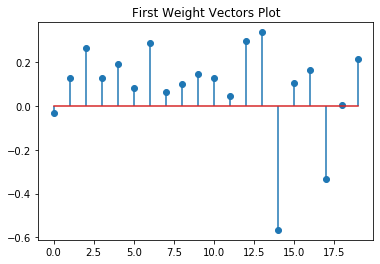

In [5]:
plt.clf()
plt.stem(country_vec[:, 0], use_line_collection = True)
plt.title("First Weight Vectors Plot")
plt.show()

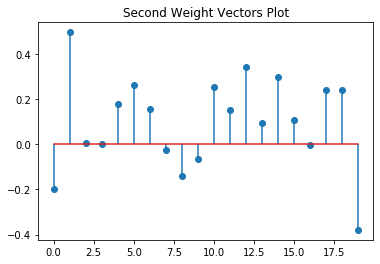

In [6]:
plt.clf()
plt.stem(country_vec[:, 1], use_line_collection = True)
plt.title("Second Weight Vectors Plot")
plt.show()

### Plot Principle Components

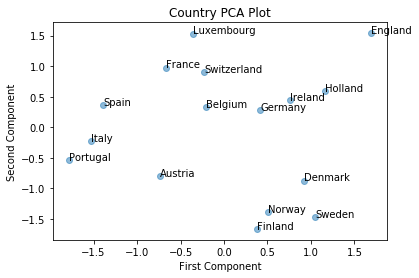

In [7]:
## Plot Country Data
plt.clf()
plt.scatter(country_dim1, country_dim2, alpha = .5)
plt.title("Country PCA Plot")
plt.xlabel("First Component")
plt.ylabel("Second Component")
for i, val in enumerate(country_names):
    plt.annotate(val, (country_dim1[i], country_dim2[i]))

plt.show()

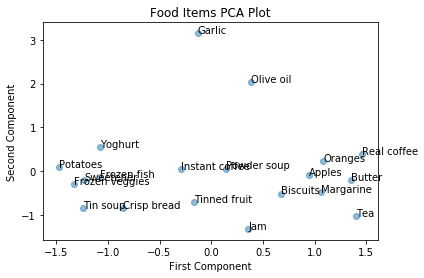

In [8]:
## Plot Food Data
plt.clf()
plt.scatter(food_dim1, food_dim2, alpha = .5)
plt.title("Food Items PCA Plot")
plt.xlabel("First Component")
plt.ylabel("Second Component")
for i, val in enumerate(food_names):
    plt.annotate(val, (food_dim1[i], food_dim2[i]))

plt.show()

## Question 2: ISOMAP

### Import Packages and Data

In [9]:
from scipy.io import loadmat
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances
import networkx as nx

images = loadmat('isomap.mat')['images']
images = images.T
m,n = images.shape
print(images.shape)
#print(images[0])
print(images)

(698, 4096)
[[0.01617647 0.01617647 0.01617647 ... 0.         0.         0.        ]
 [0.01617647 0.01617647 0.01617647 ... 0.         0.         0.        ]
 [0.01617647 0.01617647 0.01617647 ... 0.         0.         0.        ]
 ...
 [0.01617647 0.01617647 0.01617647 ... 0.         0.         0.        ]
 [0.01617647 0.01617647 0.01617647 ... 0.         0.         0.        ]
 [0.01617647 0.01617647 0.01617647 ... 0.         0.         0.        ]]


## Create Adjacency Matrix

In [158]:
## Create Adjacency matrix
A = np.full((m,m), np.inf)
e = 501 
# 22.68
dist = euclidean_distances(images, squared = True)
print(dist.shape)
print(dist)

for i in range(len(dist)):
    for d in range(len(dist)):
        if dist[i][d] <= e:
            A[i][d] = dist[i][d]
        else: continue
#print(A)

## Find Optimal e
count = []
for i in A:
    counts = 0
    for d in i:
        if d == np.inf:
            continue
        else:
            counts += 1
    count.append(counts)
print(min(count))

(698, 698)
[[  0.         354.60465992  45.4712812  ... 462.7346275  519.51597053
  325.30380096]
 [354.60465992   0.         382.32260932 ... 227.23619861 468.02449077
  439.90856957]
 [ 45.4712812  382.32260932   0.         ... 520.81634031 540.1165573
  349.09857388]
 ...
 [462.7346275  227.23619861 520.81634031 ...   0.         544.59572784
  295.6731999 ]
 [519.51597053 468.02449077 540.1165573  ... 544.59572784   0.
  412.63981452]
 [325.30380096 439.90856957 349.09857388 ... 295.6731999  412.63981452
    0.        ]]
100


### Plot A

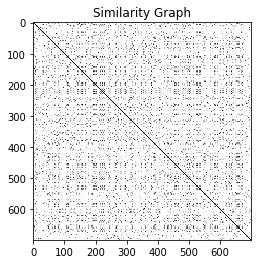

In [159]:
plt.clf()
plt.imshow(A, cmap='gray', vmin=0, vmax=255)
plt.title("Similarity Graph")

plt.show()

### Shortest Path Algorithm

In [161]:
def Matrix_D(W):
    # Generate Graph and Obtain Matrix D, \\
    # from weight matrix W defining the weight on the edge between each pair of nodes.
    # Note that you can assign sufficiently large weights to non-existing edges.

    n = np.shape(W)[0]
    Graph = nx.DiGraph()
    for i in range(n):
        for j in range(n):
            Graph.add_weighted_edges_from([(i,j,min(W[i,j], W[j,i]))])

    res = dict(nx.all_pairs_dijkstra_path_length(Graph))
    D = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            D[i,j] = res[i][j]
    np.savetxt('D.csv', D)
    return D

### Create Shortest Distance Matrix

In [162]:
D = Matrix_D(A)
print(D.shape)
print(D)

(698, 698)
[[  0.         354.60465992  36.18819497 ... 332.89897459 447.9133505
  215.42190811]
 [354.60465992   0.         382.32260932 ... 186.14658377 347.03158366
  439.90856957]
 [ 36.18819497 382.32260932   0.         ... 357.67922985 434.06000643
  180.4927849 ]
 ...
 [332.89897459 186.14658377 357.67922985 ...   0.         346.79395959
  277.03546323]
 [447.9133505  347.03158366 434.06000643 ... 346.79395959   0.
  384.27679253]
 [215.42190811 439.90856957 180.4927849  ... 277.03546323 384.27679253
    0.        ]]


### Plot D

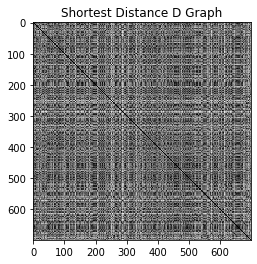

In [163]:
plt.clf()
plt.imshow(D, cmap='gray')
plt.title("Shortest Distance D Graph")

plt.show()

### Find Centering Matrix

In [195]:
I = np.identity(m)
ones = np.ones((m,m))
H = I - ones*(1/m)
neg_H = (-1/2)*H
#print("neg:", neg_H)
D_squared = D*D

C = neg_H*D_squared*H
C = (C + C.T)/(2)

print("C: ", C)

C:  [[-0.         -0.12904704 -0.00134398 ... -0.11373237 -0.20589565
  -0.04762543]
 [-0.12904704 -0.         -0.15000962 ... -0.03556062 -0.12359394
  -0.19860218]
 [-0.00134398 -0.15000962 -0.         ... -0.13129452 -0.19335647
  -0.03343327]
 ...
 [-0.11373237 -0.03556062 -0.13129452 ... -0.         -0.12342474
  -0.07876439]
 [-0.20589565 -0.12359394 -0.19335647 ... -0.12342474 -0.
  -0.15154705]
 [-0.04762543 -0.19860218 -0.03343327 ... -0.07876439 -0.15154705
  -0.        ]]


### Find Eigenvalues/vectors

In [199]:
## Find eigenvalues/vectors
e_vec, e_val, p = np.linalg.svd(C)
e_val = e_val.real
e_vec = e_vec.real

e_val = e_val[:K]
e_vec = e_vec[:, :K]

print(e_vec.shape)
print(e_val)

(698, 2)
[94.68053782 34.47714195]


### Find Z

In [200]:
lambda_mat = np.array([[e_val[0]**(1/2), 0], [0, e_val[1]**(1/2)]])

Z = np.dot(e_vec, lambda_mat)
Z.shape

(698, 2)

## Plot ISOMAP

<Figure size 432x288 with 0 Axes>

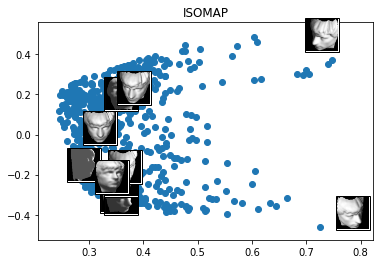

In [201]:
selected = [506, 517, 43, 293, 25, 652, 422, 525, 542, 194, 633]
plt.clf()
fig, ax = plt.subplots()

for i in selected:
        image = images[i, :].reshape(64, 64).T

        imagebox = OffsetImage(image, cmap='gray', zoom=0.5)
        ab = AnnotationBbox(imagebox, Z[i], pad=0.1)
        ax.add_artist(ab)


plt.scatter(Z[:, 0], Z[:, 1])
plt.title("ISOMAP")

plt.show()

### Use Manhattan Distance (L1)

(698, 698)
100


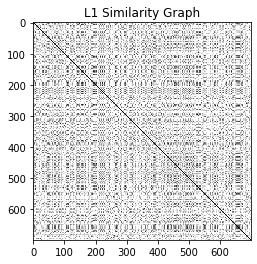

In [20]:
## Create Adjacency matrix
man_A = np.full((m,m), np.inf)
man_e = 1009.6

man_dist = manhattan_distances(images)
print(man_dist.shape)
#print(man_dist)

for i in range(len(man_dist)):
    for d in range(len(man_dist)):
        if man_dist[i][d] <= man_e:
            man_A[i][d] = man_dist[i][d]
        else: continue
#print(man_A)

## Find Optimal e
man_count = []
for i in man_A:
    man_counts = 0
    for d in i:
        if d == np.inf:
            continue
        else:
            man_counts += 1
    man_count.append(man_counts)
print(min(man_count))

## Plot A
plt.clf()
plt.imshow(man_A, cmap='gray')
plt.title("L1 Similarity Graph")

plt.show()

In [21]:
man_D = Matrix_D(man_A)
print(man_D.shape)
print(man_D)

(698, 698)
[[   0.          965.31026348  257.36994485 ... 1180.2359375
  1333.1890625   801.11789216]
 [ 965.31026348    0.          998.80539216 ...  591.33363971
  1219.31158088 1257.4520527 ]
 [ 257.36994485  998.80539216    0.         ... 1292.46237745
  1314.56237745  854.53792892]
 ...
 [1180.2359375   591.33363971 1292.46237745 ...    0.
  1235.02527574  736.96179534]
 [1333.1890625  1219.31158088 1314.56237745 ... 1235.02527574
     0.          906.32530637]
 [ 801.11789216 1257.4520527   854.53792892 ...  736.96179534
   906.32530637    0.        ]]


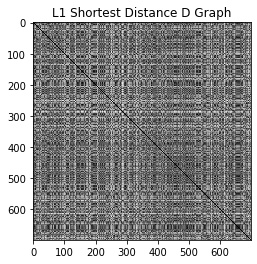

In [22]:
## Plot D
plt.clf()
plt.imshow(man_D, cmap='gray')
plt.title("L1 Shortest Distance D Graph")

plt.show()

In [181]:
K=2
## Find Centering Matrix
man_I = np.identity(m)
man_ones = np.ones((m,m))
man_H = man_I - (1/m)*man_ones
print("H:", man_H)
print(man_H.shape)

man_C = -man_H*((man_D)**2)*(man_H)
man_C = (man_C + man_C.T)/(2)

#print(man_C)

## Find eigenvalues/vectors
man_e_val, man_e_vec = ll.eigs(man_C, k=K)
man_e_val = man_e_val.real
man_e_vec = man_e_vec.real

print(man_e_vec.shape)
print(man_e_val)

## Find Z
man_lambda_mat = np.array([[abs(man_e_val[0])**(1/2), 0], [0, man_e_val[1]**(1/2)]])

man_Z = np.dot(man_e_vec, man_lambda_mat)
print(man_Z.shape)

H: [[ 0.99856734 -0.00143266 -0.00143266 ... -0.00143266 -0.00143266
  -0.00143266]
 [-0.00143266  0.99856734 -0.00143266 ... -0.00143266 -0.00143266
  -0.00143266]
 [-0.00143266 -0.00143266  0.99856734 ... -0.00143266 -0.00143266
  -0.00143266]
 ...
 [-0.00143266 -0.00143266 -0.00143266 ...  0.99856734 -0.00143266
  -0.00143266]
 [-0.00143266 -0.00143266 -0.00143266 ... -0.00143266  0.99856734
  -0.00143266]
 [-0.00143266 -0.00143266 -0.00143266 ... -0.00143266 -0.00143266
   0.99856734]]
(698, 698)
(698, 2)
[-1814.34248589   669.37893749]
(698, 2)


<Figure size 432x288 with 0 Axes>

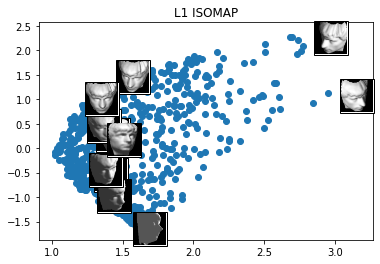

In [182]:
selected = [506, 517, 43, 293, 25, 652, 422, 525, 542, 194, 633]
plt.clf()
fig, ax = plt.subplots()

for i in selected:
        image = images[i, :].reshape(64, 64).T

        imagebox = OffsetImage(image, cmap='gray', zoom=0.5)
        ab = AnnotationBbox(imagebox, man_Z[i], pad=0.1)
        ax.add_artist(ab)

plt.scatter(man_Z[:, 0], man_Z[:, 1])
plt.title("L1 ISOMAP")

plt.show()

### PCA

In [75]:
## Find Means
images_mean = find_mean(images.T)
print(len(images_mean))

## Find xi-mu
images_sub = [i-images_mean for i in images]
images_sub = pd.DataFrame(images_sub).T
print(images_sub.shape)


## Covariance Matrix
images_cov = np.cov(images, rowvar=False, bias = True)
print("COV Matrix:", images_cov.shape)

## Define K
K= 2

## Find eigenvalues/vectors
images_val, images_vec = ll.eigs(images_cov, k=K)
images_val = images_val.real
images_vec = images_vec.real

print("eigen:")
print(images_vec.shape)
print(images_val)

## Find first 2 PCA
images_dim1 = np.dot(images_vec[:,0].T,images_sub)/math.sqrt(images_val[0])
images_dim2 = np.dot(images_vec[:,1].T,images_sub)/math.sqrt(images_val[1])
print(images_dim2.shape)

dims = np.vstack((images_dim1, images_dim2)).T
print(dims.shape)

4096
(4096, 698)
COV Matrix: (4096, 4096)
eigen:
(4096, 2)
[58.4246344  46.58694359]
(698,)
(698, 2)


<Figure size 432x288 with 0 Axes>

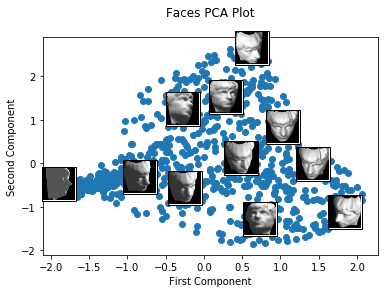

In [122]:
## Plot PCA
selected = [506, 517, 43, 293, 25, 652, 422, 525, 542, 194, 633]
plt.clf()
fig, ax = plt.subplots()

for i in selected:
        image = images[i, :].reshape(64, 64).T

        imagebox = OffsetImage(image, cmap='gray', zoom=0.5)
        ab = AnnotationBbox(imagebox, dims[i], pad=0.1)
        ax.add_artist(ab)

plt.scatter(images_dim1, images_dim2)
plt.title("Faces PCA Plot\n")
plt.xlabel("First Component")
plt.ylabel("Second Component")

plt.show()

## Question 3: Eigenfaces

### Import Packages and Data

In [26]:
import glob
from PIL import Image
from sklearn import decomposition

## First Subject
one_files = glob.glob("yalefaces\subject01.*.gif")

one_df_list = []
for file in one_files:
    data = Image.open(file)
    data = data.reduce(4)
    one_df_list.append(data)
width, height = one_df_list[0].size
print(width, height)    
print(len(list(one_df_list[0].getdata())))

one_faces = []
for i in one_df_list:
    one_faces.append(np.array(i.getdata()))

one_faces = pd.DataFrame(one_faces)
print(one_faces.shape)

## Second Subject
two_files = glob.glob("yalefaces\subject02.*.gif")

two_df_list = []
for file in two_files:
    data = Image.open(file)
    data = data.reduce(4)
    two_df_list.append(data)
    
print(len(list(two_df_list[0].getdata())))

two_faces = []
for i in two_df_list:
    two_faces.append(np.array(i.getdata()))
two_faces = pd.DataFrame(two_faces)

print("2:" , two_faces.shape)


80 61
4880
(10, 4880)
4880
2: (9, 4880)


## PCA

In [27]:
## First Subject
one_pca = decomposition.PCA(6)
one_pca.fit(one_faces.T)
X_one = one_pca.transform(one_faces.T)

print(X_one.shape)
X_one = X_one.T
print(X_one.shape)


## Second Subject
two_pca = decomposition.PCA(6)
two_pca.fit(two_faces.T)
X_two = two_pca.transform(two_faces.T)

print(X_two.shape)
X_two = X_two.T
print(X_two.shape)

(4880, 6)
(6, 4880)
(4880, 6)
(6, 4880)


## Plot Eigenfaces

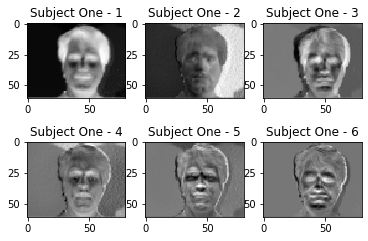

In [28]:
## First Subject

plt.clf()
plt.subplot(2, 3, 1)
plt.imshow(X_one[0, :].reshape(61, 80), cmap='gray')
plt.title("Subject One - 1")

plt.subplot(2,3,2)
plt.imshow(X_one[1, :].reshape(61, 80), cmap='gray')
plt.title("Subject One - 2")

plt.subplot(2,3,3)
plt.imshow(X_one[2, :].reshape(61, 80), cmap='gray')
plt.title("Subject One - 3")

plt.subplot(2,3,4)
plt.imshow(X_one[3, :].reshape(61, 80), cmap='gray')
plt.title("Subject One - 4")

plt.subplot(2,3,5)
plt.imshow(X_one[4, :].reshape(61, 80), cmap='gray')
plt.title("Subject One - 5")

plt.subplot(2,3,6)
plt.imshow(X_one[5, :].reshape(61, 80), cmap='gray')
plt.title("Subject One - 6")

plt.show()

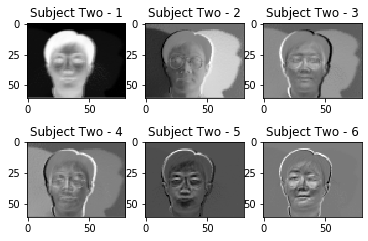

In [29]:
## Second Subject

plt.clf()
plt.subplot(2, 3, 1)
plt.imshow(X_two[0, :].reshape(61, 80), cmap='gray')
plt.title("Subject Two - 1")

plt.subplot(2,3,2)
plt.imshow(X_two[1, :].reshape(61, 80), cmap='gray')
plt.title("Subject Two - 2")

plt.subplot(2,3,3)
plt.imshow(X_two[2, :].reshape(61, 80), cmap='gray')
plt.title("Subject Two - 3")

plt.subplot(2,3,4)
plt.imshow(X_two[3, :].reshape(61, 80), cmap='gray')
plt.title("Subject Two - 4")

plt.subplot(2,3,5)
plt.imshow(X_two[4, :].reshape(61, 80), cmap='gray')
plt.title("Subject Two - 5")

plt.subplot(2,3,6)
plt.imshow(X_two[5, :].reshape(61, 80), cmap='gray')
plt.title("Subject Two - 6")

plt.show()

### Test Files

In [204]:
## First Subject

one_test = Image.open("yalefaces\subject01-test.gif")
one_test = one_test.reduce(4)

one_test_face = pd.DataFrame(np.array(one_test.getdata()))

#print(one_test_face.shape)

## Second Subject

two_test = Image.open("yalefaces\subject02-test.gif")
two_test = two_test.reduce(4)

two_test_face = pd.DataFrame(np.array(two_test.getdata()))

#print(two_test_face.shape)

sub1_top = X_one[0, :]
sub2_top = X_two[0, :]

#print(sub1_top.shape)
#print(sub2_top.shape)

result_11 = np.dot(sub1_top.T, one_test_face) / (np.linalg.norm(sub1_top) * np.linalg.norm(one_test_face))
#print(result_11)

result_12 = np.dot(sub1_top.T, two_test_face) / (np.linalg.norm(sub1_top) * np.linalg.norm(two_test_face))
#print(result_12)

result_21 = np.dot(sub2_top.T, one_test_face) / (np.linalg.norm(sub2_top) * np.linalg.norm(one_test_face))
#print(result_21)

result_22 = np.dot(sub2_top.T, two_test_face) / (np.linalg.norm(sub2_top) * np.linalg.norm(two_test_face))
#print(result_22)

print("||", float(result_11), " |", float(result_12), " ||")
print("||", float(result_21), "|", float(result_22), "||")

|| -0.3728433218345001  | -0.0893482841869412  ||
|| -0.11877786322172157 | -0.38692961672003157 ||
